<a href="https://colab.research.google.com/github/aunghlaingtun/ITI106/blob/main/myassingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

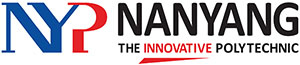

                                      ITI 106 Foundation of Deep learning 2024 Assingment


# Introduction

An Artificial Neural Network (ANN) act the human brain to recognize patterns in data. In a feedforward neural network, data travels from input to output through layers of neurons. Each neuron processes input with weights and biases, then passes the result to the next layer. This setup excels at classification and regression tasks by learning complex relationships through training.

# Architecture

Feedforward Neural Networks (FNN) are the simplest type of artificial neural networks. They consist of multiple layers of neurons where each neuron connects to the neurons in the next layer. These connections have weights that adjust during the training process to improve accuracy. The data moves in one direction—from the input layer, through any hidden layers, and finally to the output layer—without forming cycles or loops. Hidden layers are the intermediary stages where the magic of learning happens.

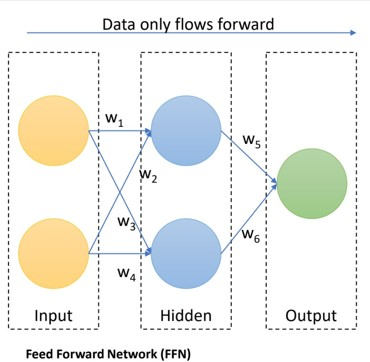



In this Assignment, i aim to develop a fully-connected, feedforward neural network using python progrmming language, Tensorflow Libary and  Keras API to classify weather data from the Ang Mo Kio area. The dataset includes various meteorological features such as temperature, wind speed, and rainfall measurements.Assingment Objective is  to classify days as either “rainy” or “non-rainy” based on these features.

To achieve this, i will follow a structured approach that includes as bleow:

1.   Data Pre-processing
2.   Data Transformed
3.   Model Definition
4.   Model Training
5.   Model Evaluation
6.   Vasulization of model performance

And then performing  model  fine-tune the hyperparameters to enhance the model accuracy and robustness.

## Building a Neural Network Model with TensorFlow and Keras

**TensorFlow**, developed by Google, is an open-source library designed for large-scale machine learning and numerical computation, offering a robust ecosystem of tools for building and deploying models.

**Keras** is a high-level neural networks API in Python that runs on top of TensorFlow and other frameworks like Theano and CNTK. It is designed for fast experimentation, making deep learning accessible and efficient for developers.

TensorFlow and Keras are ideal for this assignment, providing a powerful, flexible framework for building and tuning neural networks. TensorFlow handles complex computations efficiently, while Keras offers an intuitive, high-level API for fast experimentation. Together, they enable efficient development of an accurate and scalable rainfall prediction model.

# 1. Data Pre processing

Data preprocessing is a crucial step in data science-based and machine learning. It involves transforming raw data into a clean, structured format suitable to use it for mechining learning model.

Using `angmokio.csv` dataset that for data preprocessing involved filling missing values, extracting date components (year, month, day), encoding the "Rainy" target as binary, and standardizing continuous features like temperature and wind speed. Finally, split the data into training and testing sets for model training.

Datasets used in the assingment that from Historical Daily Weather Record of singapore data. This dataset can be reused and cited in research publications that from NEA website as below:

https://data.gov.sg/datasets/d_03bb2eb67ad645d0188342fa74ad7066/view

1.1 Construct DataFrame


---


Importing data into Google Drive and construct a DataFrame with pandas as

1.   upload 'angmokio.csv'  file to Google Drive
2.   Mount google drive using from google.colab for import drive
3.   locat file path
4.   import pandas and read it data

And then manipulate and analyze the data as needed.


In [1]:
#importing necessary library
import pandas as pd
import numpy as np
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive',force_remount=True)

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/angmokio.csv')

Mounted at /content/drive


Calling Dataframe from inport data as below:

In [3]:
data

,Unnamed: 0,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,Ang Mo Kio,2014,1,1,0.0,0.0,0.0,0.0,26.3,28.7,24.5,7.2,29.9
1,1,Ang Mo Kio,2014,1,2,0.0,0.0,0.0,0.0,26.9,30.4,24.6,8.2,32.0
2,2,Ang Mo Kio,2014,1,3,8.8,8.6,8.8,8.8,26.5,30.1,24.8,7.1,29.5
3,3,Ang Mo Kio,2014,1,4,1.4,1.4,1.4,1.4,26.6,30.9,24.7,4.2,30.2
4,4,Ang Mo Kio,2014,1,5,7.2,1.6,3.2,5.2,24.5,25.5,23.3,5.2,24.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2552,Ang Mo Kio,2020,12,27,8.6,7.6,8.6,8.6,NaN,NaN,NaN,NaN,NaN
2553,2553,Ang Mo Kio,2020,12,28,0.2,0.2,0.2,0.2,27.8,31.6,25.3,7.2,32.4
2554,2554,Ang Mo Kio,2020,12,29,2.4,2.0,2.2,2.4,26.6,31.1,24.7,4.6,27.4
2555,2555,Ang Mo Kio,2020,12,30,0.0,0.0,0.0,0.0,27.7,32.0,24.8,6.3,31.7


### 1.2. Handling for incomplete data


---



In [4]:
# Filter to show only rows with NaN values
nan_rows = data[data.isnull().any(axis=1)]

# Display the rows with NaN values
nan_rows

,Unnamed: 0,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
58,58,Ang Mo Kio,2014,2,28,0.0,0.0,0.0,0.0,NaN,NaN,NaN,8.8,37.4
290,290,Ang Mo Kio,2014,10,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,405,Ang Mo Kio,2015,2,10,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
406,406,Ang Mo Kio,2015,2,11,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
407,407,Ang Mo Kio,2015,2,12,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,2548,Ang Mo Kio,2020,12,23,1.6,1.6,1.6,1.6,NaN,NaN,NaN,NaN,NaN
2549,2549,Ang Mo Kio,2020,12,24,8.4,6.8,7.2,8.0,NaN,NaN,NaN,NaN,NaN
2550,2550,Ang Mo Kio,2020,12,25,1.4,1.4,1.4,1.4,NaN,NaN,NaN,NaN,NaN
2551,2551,Ang Mo Kio,2020,12,26,17.2,10.4,13.8,15.2,NaN,NaN,NaN,NaN,NaN


### 1.3. Data cleaning


---


DataFrame information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2557 non-null   int64  
 1   Station                        2557 non-null   object 
 2   Year                           2557 non-null   int64  
 3   Month                          2557 non-null   int64  
 4   Day                            2557 non-null   int64  
 5   Daily Rainfall Total (mm)      2512 non-null   float64
 6   Highest 30 min Rainfall (mm)   2508 non-null   float64
 7   Highest 60 min Rainfall (mm)   2506 non-null   float64
 8   Highest 120 min Rainfall (mm)  2506 non-null   float64
 9   Mean Temperature (°C)          2509 non-null   float64
 10  Maximum Temperature (°C)       2509 non-null   float64
 11  Minimum Temperature (°C)       2509 non-null   float64
 12  Mean Wind Speed (km/h)         2512 non-null   f

Removeing unnecessary data and filling NaN data to value.


In [6]:
data.columns

Index(['Unnamed: 0', 'Station', 'Year', 'Month', 'Day',
       'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)',
       'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)',
       'Mean Temperature (°C)', 'Maximum Temperature (°C)',
       'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)',
       'Max Wind Speed (km/h)'],
      dtype='object')

In [7]:
data1 = data
data1.shape

(2557, 14)

In [8]:
# Remove a single column
data1 = data1.drop('Station', axis=1)
data1.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
       'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)',
       'Highest 120 min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)'],
      dtype='object')

In [9]:
data1.fillna(0, inplace=True)
data1
data1.shape

(2557, 13)

In [10]:
#print out data shape
data.shape # that will tell me numbers of rows and colums
data1.shape

(2557, 13)

In [11]:
# Rename Columns from "Unnamed :0 " to "N0":
data1.rename(columns={'Unnamed: 0': 'N0'}, inplace=True)
# Now,  can access the columns:
data1.columns

Index(['N0', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
       'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)',
       'Highest 120 min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)'],
      dtype='object')

### 1.4.Numerical display of data summary


---


In [12]:
data1.shape

(2557, 13)

In [13]:
# Calculate the statistical summary for numerical
numerical_summary = data1.describe()
# Display the summary
numerical_summary

,N0,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.00000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,1278.000000,2017.000782,6.522487,15.730935,6.077943,3.826633,4.702659,5.26402,27.436136,31.355925,24.789441,7.455338,31.463238
std,738.286643,2.000587,3.449499,8.802361,12.417081,7.577169,9.638519,10.89281,3.980821,4.648557,3.698270,3.973305,8.492010
min,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,639.000000,2015.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.00000,27.100000,31.000000,24.200000,4.800000,26.600000
50%,1278.000000,2017.000000,7.000000,16.000000,0.200000,0.200000,0.200000,0.20000,28.000000,32.200000,25.200000,6.300000,31.000000
75%,1917.000000,2019.000000,10.000000,23.000000,6.000000,3.800000,4.200000,4.80000,28.900000,33.100000,26.200000,8.600000,36.000000
max,2556.000000,2020.000000,12.000000,31.000000,101.600000,60.400000,88.000000,98.60000,31.100000,35.800000,28.600000,22.000000,83.900000


In [14]:
data1.shape

(2557, 13)

In [15]:
cleaned_data= data1.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv', index=False) # save as cleanded data


# **2**. Data transformation

Data transformation converts raw data into a more analyzable format. Key steps include normalization, standardization, encoding categorical variables, and handling missing values. These processes enhance data quality, consistency, and help models identify key patterns for accurate analysis.

In [16]:
import pandas as pd
import numpy as np
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv')
df.head(5)

,N0,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,2014,1,1,0.0,0.0,0.0,0.0,26.3,28.7,24.5,7.2,29.9
1,1,2014,1,2,0.0,0.0,0.0,0.0,26.9,30.4,24.6,8.2,32.0
2,2,2014,1,3,8.8,8.6,8.8,8.8,26.5,30.1,24.8,7.1,29.5
3,3,2014,1,4,1.4,1.4,1.4,1.4,26.6,30.9,24.7,4.2,30.2
4,4,2014,1,5,7.2,1.6,3.2,5.2,24.5,25.5,23.3,5.2,24.1


### 2.1. Classification

---
Creating a Target Variable of y for column name as 'Rainy' so that to represent rainy days as 1 and non-rainy days as 0 that for a binary classification problem.

In [17]:
# Create a new target variable for classification
df['Rainy'] = np.where(df['Daily Rainfall Total (mm)'] > 0, 1, 0)

#print data frame for checked updata data as below:
df.head(3)

,N0,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Rainy
0,0,2014,1,1,0.0,0.0,0.0,0.0,26.3,28.7,24.5,7.2,29.9,0
1,1,2014,1,2,0.0,0.0,0.0,0.0,26.9,30.4,24.6,8.2,32.0,0
2,2,2014,1,3,8.8,8.6,8.8,8.8,26.5,30.1,24.8,7.1,29.5,1


In [18]:
df.tail(3)

,N0,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Rainy
2554,2554,2020,12,29,2.4,2.0,2.2,2.4,26.6,31.1,24.7,4.6,27.4,1
2555,2555,2020,12,30,0.0,0.0,0.0,0.0,27.7,32.0,24.8,6.3,31.7,0
2556,2556,2020,12,31,5.2,4.6,5.2,5.2,27.0,31.7,24.9,6.0,29.1,1


In [19]:
df.shape # data shape after creation of target "Rainy"

(2557, 14)

### 2.2. Select features and target variable

---
My model first choose X and y data that i have trained and not well  performing
due to incorrectly selecting of features as below:
```
# Select features and target variable
X = data[['Year', 'Month', 'Day', 'Mean Temperature (°C)', 'Maximum Temperature (°C)',
          'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']].values
y = data['Rainy'].values
```



In [20]:
# slect feature and target variable for the model
X = df[['Year', 'Month', 'Day', 'Mean Temperature (°C)', 'Maximum Temperature (°C)',
          'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)',
          'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)',
          'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']].values
y = df['Rainy'].values

In [21]:
df.columns

Index(['N0', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
       'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)',
       'Highest 120 min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'Rainy'],
      dtype='object')

In [22]:
df.shape

(2557, 14)

### 2.3. Standardization

---
There are process adjusts the distribution of each feature so that it follows a standard normal distribution. Centering data to have a mean of 0 and scaling it to have a standard deviation of 1 with below code:

In [23]:
# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print(X)

[[-1.50024453 -1.60126653 -1.67384812 ... -0.50512023 -0.4879981
  -0.48335095]
 [-1.50024453 -1.60126653 -1.56022002 ... -0.50512023 -0.4879981
  -0.48335095]
 [-1.50024453 -1.60126653 -1.44659192 ...  0.63009034  0.42518377
   0.32467943]
 ...
 [ 1.49946243  1.58822597  1.50773868 ... -0.24111777 -0.25970263
  -0.26297903]
 [ 1.49946243  1.58822597  1.62136678 ... -0.50512023 -0.4879981
  -0.48335095]
 [ 1.49946243  1.58822597  1.73499488 ...  0.10208542  0.05160937
  -0.00587845]]


### 2.4. Data splitting

---

Splitting the dataset into training and testing sets.

**Explained code details of each line :**

Get Dataset Size:
```
dataset_size = len(X)
```
This calculates the total number of examples (or rows) in the dataset.
Define Training Set Size:

```
train_size = int(dataset_size * 0.8)
```
This sets the training set size to 80% of the total dataset, converting it to an integer. This leaves the remaining 20% for the test set.
Split the Features (X):

```
X_train, X_test = X[:train_size], X[train_size:]
```
X_train takes the first 80% of the data, and X_test takes the remaining 20%. This divides the feature data into training and testing sets.
Split the Target (y):

```
y_train, y_test = y[:train_size], y[train_size:]
```

Similarly, this divides the target variable (y) into training and testing sets using the same 80/20 split.

In [24]:
# Split the data into training and testing sets using NumPy
dataset_size = len(X)  #Get Dataset Size: dataset_size = len(X)
train_size = int(dataset_size * 0.8) # Define Training Set Size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


### 2.5. Printing  for dataset shape italicised text

---
Purpose
This split allows me to train the model on 80% of the data and then evaluate it on the remaining 20%, helping assess its performance on unseen data.

In [25]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2045, 12)
X_test shape: (512, 12)
y_train shape: (2045,)
y_test shape: (512,)


### 2.6. Collection Train Dataset and Test Dataset

---

In [26]:
import pandas as pd
# Use the actual feature names based on your dataset
feature_names = ['Year', 'Month', 'Day', 'Mean Temperature (°C)', 'Maximum Temperature (°C)',
          'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)',
          'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)',
          'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']

# Convert the training and testing sets to DataFrames
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)
y_train_df = pd.DataFrame(y_train, columns=['Rainy'])  # target name
y_test_df = pd.DataFrame(y_test, columns=['Rainy'])

# Combine features and targets for training and testing sets
train_data = pd.concat([X_train_df, y_train_df], axis=1)
test_data = pd.concat([X_test_df, y_test_df], axis=1)

# Save to CSV files to googledrive as
train_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Traing and testing datasets/train_data.csv', index=False)  # Save training data
test_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Traing and testing datasets/test_data.csv', index=False)    # Save testing data

print("Training and testing datasets saved as train_data.csv and test_data.csv")


Training and testing datasets saved as train_data.csv and test_data.csv


A validation set is a subset of training set for tuning hyperparameters.
In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by setting apart 2557 samples from the original training data:

# 3.Model Definition

An artificial neural network (ANN) consists of interconnected neurons, each performing a function as described by the equation:

$$
 y = g \left( \sum_{i} x_i w_i + b \right)
$$

Design ANN network since the data is 2D tensors (sample, features), choose deep neural network with fully-connected (Dense) layers and relu activations

Here i set the network with hyperparamter-tuning
Two intermediate layers with 8 hidden units each
Third layer which will output the scalar prediction regarding the sentiment of the current review.
The intermediate layers will use relu as their "activation function"

The final layer will use a sigmoid activation so as to output a probability a score between 0 and 1, indicating how likely the sample is to have the target "1",

### 3.1. Importing necessary libraries  

---

In [27]:
import tensorflow as tf
from tensorflow.keras import layers,Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

### 3.2 Model building

---

Demonstrate for build a simple Keras Sequential model as bleow code:



In [28]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Input(shape=(12,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

When designing a neural network with dense layers, we need to make two critical architectural decisions,There are

*   **Number of Layers:** This refers to how many layers of neurons (nodes) network will have. More layers can allow the model to learn more complex patterns, but it can also make the model more prone to overfitting and harder to train.

*   **Number of Hidden Units per Layer:** This decision is about how many neurons should be in each layer. More neurons can increase the model's capacity to learn from data, but also increase computational cost and the risk of overfitting.

The process of finding the best combination of these parameters to achieve optimal performance is called **hyperparameter tuning**.

 Hyperparameter tuning involves systematically adjusting these settings and evaluating model performance to find the most effective architecture.

### 3.3 My Model Summary


---
Before proceeding, it was  helpful to review the model i have created. Using the function of  `model.summary()` that  provides a detailed overview of the model's structure, which can be particularly useful for identifying any errors in the model specification.

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

### 3.4 Complile: loss function, optimizer and metrics

Compiling is prepares the model for training by defining how it will learn and be evaluated.

**Loss function**: For a binary classification problem and the output is a probability, is it best to use the binary_crossentropy loss.

**Crossentropy** is a quantity from the field of Information Theory, that measures the "distance" between probability distributions.

**Optimizer** Adam optimizer is chosen here.

**Metrics:** accuracy measure the accuracy of the model



In [30]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print('Model Complile!!!')

Model Complile!!!


Complile: loss function, optimizer and metrics



### 3.5.Creating Checkpoint


---
The way us to helping capturing the weights of our model with creating checkpoit can be done .
This callback saves the model weights during training based on the specified conditions.

There are 2 ways to capture the weights

1. Using ```get_weights()```. This will capture the weights of the neural network of a particular layer.

2. Using ```save_weights()```. This will capture the weights of all layers.

For convenience, we will use the second method.

Add the following codes to create a checkpoint by saving all the weights of the model.

In [31]:
# Enter your codes here to save the weights
model.save_weights("/content/drive/MyDrive/Colab Notebooks/Traing and testing datasets/initial_weights.weights.h5") # h5 format /content/initial_weights.weights.h5

# 4.Model Training

**Training the model means adjusting its weights in such a way that it can transform the features(x) into the target(y).**

The fit method in Keras is used to train the model on the training data. It takes several parameters, including the input data (X_train), target data (y_train), number of epochs (iterations over the dataset), batch size (number of samples per gradient update), and validation split (fraction of the training data to be used as validation data).

In this Assingmnet ,i build a neural network that predicts whether it will be "Rainy" based on the provided weather features, i do need to set it up as a binary classification problem since the target ("Rainy") is  binary (e.g., 1 for "Rainy" and 0 for "Not Rainy").

Train the model on the training data with a validation split of 20%. The training history is captured in the history object.

In [32]:
# Train the model with validation split
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2)
print("model trained!")

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5645 - loss: 0.6553 - val_accuracy: 0.6357 - val_loss: 0.5878
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7011 - loss: 0.5612 - val_accuracy: 0.7726 - val_loss: 0.5337
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7905 - loss: 0.4668 - val_accuracy: 0.8337 - val_loss: 0.4718
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8547 - loss: 0.3827 - val_accuracy: 0.8337 - val_loss: 0.4205
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8680 - loss: 0.3232 - val_accuracy: 0.8484 - val_loss: 0.3807
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8777 - loss: 0.2997 - val_accuracy: 0.8729 - val_loss: 0.3572
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8839 - loss: 0.2811 - val_accuracy: 0.8778 - val_loss: 0.3354
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8881 - loss: 0.2688 - val_accuracy: 0.

# 5.Model Evaluation

Evaluate the model’s performance on the test set and print out for model's **loss** & **accuracy**.

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("loss:", test_loss)
print("accuracy", test_acc)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7520 - loss: 0.5065 
loss: 0.4994657039642334
accuracy 0.736328125


### 5.1 History object

---



Histrory records the historical information in training procedure.
The call to model.fit() returns a History object.
This object has a member history, which is a dictionary containing information during training.
It contains 4 entries: ['loss', 'accuracy','Val_accuracy', 'val_loss'] during training and during validation

In [34]:
history_dict = history.history
print(history_dict.keys())

for metric_name, metric_values in history_dict.items():
    print(f"{metric_name}: {metric_values[:5]}")  # Print only first 5 values

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
accuracy: [0.5984107851982117, 0.7432762980461121, 0.8019559979438782, 0.8490220308303833, 0.8716381192207336]
loss: [0.6230648159980774, 0.5373054146766663, 0.45465993881225586, 0.37706345319747925, 0.32471224665641785]
val_accuracy: [0.6356968283653259, 0.7726161479949951, 0.8337408304214478, 0.8337408304214478, 0.8484107851982117]
val_loss: [0.5877910256385803, 0.5337403416633606, 0.471809446811676, 0.4204624593257904, 0.3807278573513031]


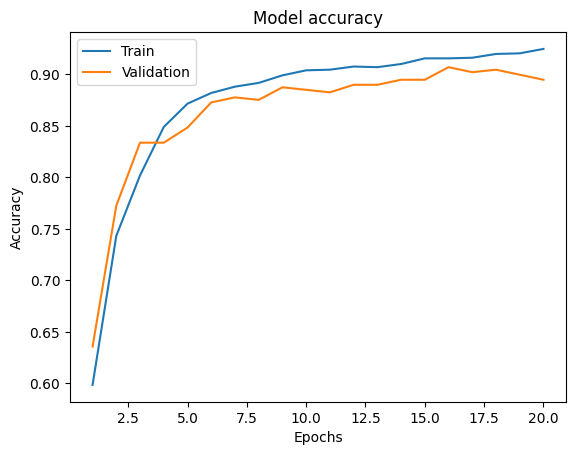

In [35]:
# Plot training & validation accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


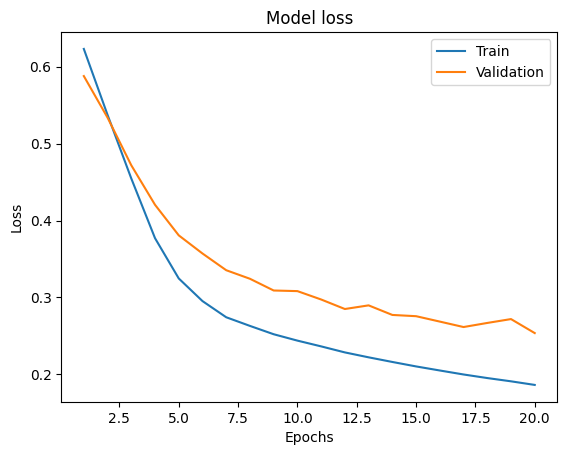

In [36]:
# Plot training & validation loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The core challenge in  this model learning lies in balancing optimization and generalization. Optimization focuses on fine-tuning a model for the best performance on training data, while generalization measures how well the model performs on unseen data. Although optimization is limited to training data, the ultimate goal is to achieve strong generalization.

Above results suggest that model is performing fairly well on both the training and test sets, although there is a slight drop in accuracy from the training set to the test set. This could indicate a bit of overfitting, where the model is performing slightly better on the training data than on new, unseen data.

### **Model Generalizations**

Adding Regularizations techniques that can penalties to the loss function, such as

*   L1,L2 Regularizeration
*   Earlier stop
*   Dropout

In order to improve the model generalization, consider techniques like regularization L1, L2 to introduced.
Also for Deep learning processs, increase Denses to 8 to 16 below:


In [37]:
from tensorflow import keras
from keras import layers
from keras import regularizers

model = keras.Sequential()
model.add(keras.Input(shape=(12,)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("loss:", test_loss)
print("accuracy", test_acc)

# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6429 - loss: 0.9189 - val_accuracy: 0.8142 - val_loss: 0.7200
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8224 - loss: 0.6286 - val_accuracy: 0.8484 - val_loss: 0.5747
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8355 - loss: 0.5446 - val_accuracy: 0.8729 - val_loss: 0.4871
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8898 - loss: 0.4395 - val_accuracy: 0.8704 - val_loss: 0.4414
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8954 - loss: 0.3943 - val_accuracy: 0.8753 - val_loss: 0.4049
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8939 - loss: 0.3869 - val_accuracy: 0.8753 - val_loss: 0.3857
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9045 - loss: 0.3565 - val_accuracy: 0.8826 - val_loss: 0.3661
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9002 - loss: 0.3389 - val_accuracy: 0.

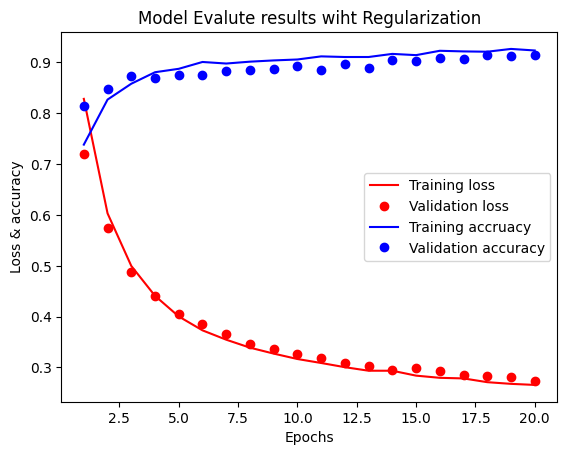

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')

plt.plot(epochs, accuracy, 'b', label='Training accruacy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation accuracy')
plt.title('Model Evalute results wiht Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss & accuracy')
plt.legend()

plt.show()

After applying regularization techniques,model test data metrics improved:
```
loss: 0.3678138852119446
accuracy 0.857421875
```
These results indicate that regularization enhanced the model ability to generalize from the training data to new, unseen data.

### **Implementation with dropout in Keras**

Dropout is one of the most effective and most commonly used regularization techniques for ANNs.
Introduce dropout in a network via the Dropout layer
Applied to the output of layer right before it.



In [39]:
from tensorflow import keras
from keras import layers
from keras import regularizers
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
model.add(keras.Input(shape=(12,)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("loss:", test_loss)
print("accuracy", test_acc)

# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5760 - loss: 0.9266 - val_accuracy: 0.8044 - val_loss: 0.7267
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7751 - loss: 0.7042 - val_accuracy: 0.8435 - val_loss: 0.5828
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8079 - loss: 0.5830 - val_accuracy: 0.8533 - val_loss: 0.5137
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8284 - loss: 0.5279 - val_accuracy: 0.8631 - val_loss: 0.4740
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8411 - loss: 0.4802 - val_accuracy: 0.8606 - val_loss: 0.4475
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8627 - loss: 0.4486 - val_accuracy: 0.8582 - val_loss: 0.4363
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8655 - loss: 0.4242 - val_accuracy: 0.8631 - val_loss: 0.4171
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.4336 - val_accuracy: 0.

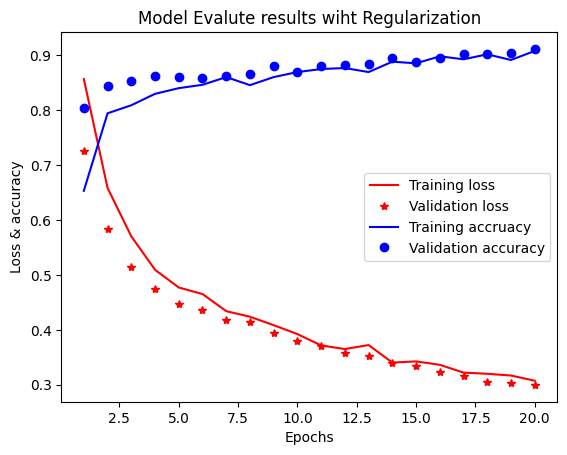

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'r*', label='Validation loss')

plt.plot(epochs, accuracy, 'b', label='Training accruacy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation accuracy')
plt.title('Model Evalute results wiht Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss & accuracy')
plt.legend()

plt.show()

I added **early stopping** and increased the number of training **epochs** from **20** to **40** to enhance model performance and prevent overfitting.

In [71]:
from tensorflow import keras
from keras import layers
from keras import regularizers
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
model.add(keras.Input(shape=(12,)))
model.add(layers.Dense(32, activation='relu'))#, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(layers.Dense(16, activation='relu'))#, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

#printing model information
model.summary()

# Compile the model
#optimizer = Adam(learning_rate=0.02)  # Adjusted learning rate but not require for my model the moments
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model with validation split and early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=40, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("loss:", test_loss)
print("accuracy", test_acc)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 32)                  │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6081 - loss: 0.6584 - val_accuracy: 0.8337 - val_loss: 0.4938
Epoch 2/40
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7565 - loss: 0.5023 - val_accuracy: 0.8460 - val_loss: 0.3825
Epoch 3/40
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8466 - loss: 0.3832 - val_accuracy: 0.8655 - val_loss: 0.3350
Epoch 4/40
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8392 - loss: 0.3691 - val_accuracy: 0.8680 - val_loss: 0.3144
Epoch 5/40
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - loss: 0.3412 - val_accuracy: 0.8655 - val_loss: 0.3076
Epoch 6/40
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8584 - loss: 0.3323 - val_accuracy: 0.8729 - val_loss: 0.3004
Epoch 7/40
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8803 - loss: 0.3009 - val_accuracy: 0.8655 - val_loss: 0.2961
Epoch 8/40
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8365 - loss: 0.3378 - val_accuracy: 0.

### 5.2 Make Predictions

---



Make predictions on the test set and convert probabilities to binary predictions


$$
y_{\text{pred}}(i) = \begin{cases}
1 & \text{if } \text{model.predict}(X_{\text{test}})[i] > 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

The model conditional statement for classification where i  used for predeict as base on output results are classifed with **>0.5** value represent in mathematical terms as above:



Predictions are made using the predict method, and probabilities are converted to binary class labels print for all **X_test data point**.as below code:

In [72]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


# 6.Vasualization of Model performance


Visualizing model performance is a crucial step in understanding how well our model is performing and where it might need improvement.
Plotting the training and validation accuracy and loss over epochs helps identify whether the model is overfitting or underfitting.




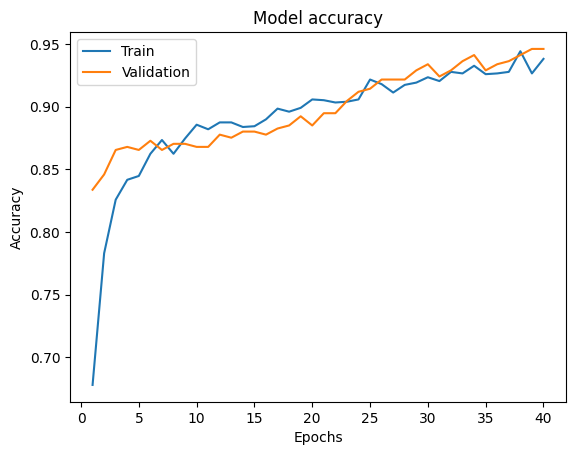

In [73]:
# Plot training & validation accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

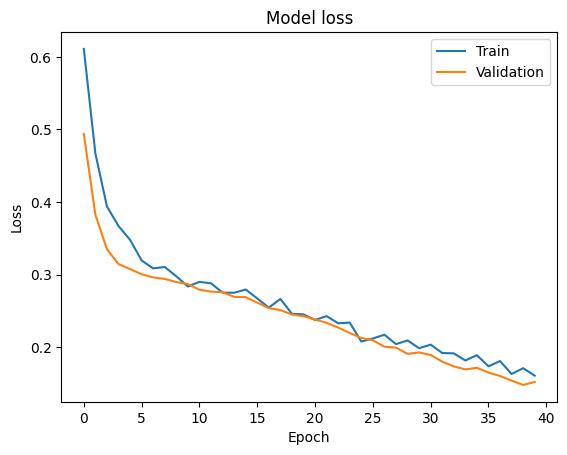

In [74]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [75]:
# Calculate accuracy manually
correct_predictions = np.sum(y_test == y_pred.flatten())
accuracy = correct_predictions / y_test.shape[0]
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9043


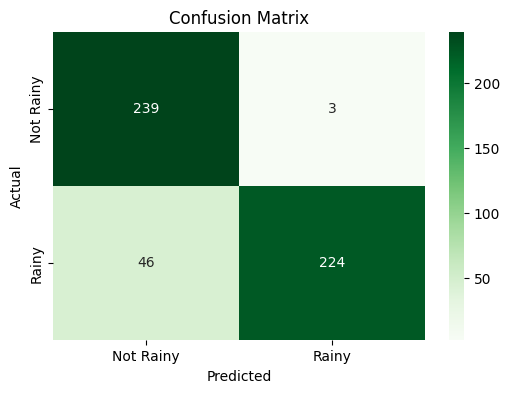

In [76]:
import seaborn as sns

# Calculate confusion matrix
conf_matrix = np.zeros((2, 2), dtype=int)
for true, pred in zip(y_test.flatten(), y_pred.flatten()):
    conf_matrix[int(true)][int(pred)] += 1

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Rainy', 'Rainy'], yticklabels=['Not Rainy', 'Rainy'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### **Conclusion:**

Once i've trained the model, it learns patterns from historical weather data—like how different temperatures, wind speeds, and previous rainfall amounts are associated with rainy or non-rainy days. When i provide it with new data (for example, weather conditions for the next day), the model uses these learned patterns to predict whether it is likely to rain or not.

Practically how will be works as

1. **Training**: During training, the model analyzes the historical data and adjusts its internal parameters to minimize prediction errors. This helps it understand which features (like temperature and wind speed) are most indicative of rain.

2. **Prediction on New Data**: After training, we can input new weather conditions (e.g., for the upcoming day). The model will then use what it has learned to output a probability of rain based on those conditions.

3. **Interpretation**:
   - If the probability is above a set threshold (often 0.5), the model predicts rain.
   - If the probability is below that threshold, it predicts no rain.

So, if we feed the model data for, say, tomorrow’s weather, it will give us a prediction based on historical patterns. If it predicts rain, we can treat it as a likely outcome for tomorrow, based on how similar conditions have led to rain in the past. This is useful for planning or preparation activities that depend on the weather!


## Comparison of deep learning architectures

In **Deep Learning**, picking the right architecture is key to solving our problem efficiently.

Overview of Key Deep Learning Architectures are


*    Feedforward Neural Networks (FNNs) are a basic, versatile choice, ideal for simpler tasks like classification or regression problems where data is not sequential. They are straightforward but can fall short for more complex problems like time-series or image data


*   Convolutional Neural Networks (CNNs) shine when dealing with grid-like data, especially images. They excel at detecting patterns and spatial features but are not as effective for sequential data.

*   Recurrent Neural Networks (RNNs) are perfect for sequential data such as time-series, speech, or text. They remember past inputs, making them great for tasks where the order matters. However, they can have trouble with long sequences due to vanishing gradients.

*   Long Short-Term Memory Networks (LSTMs) are a specialized version of RNNs, designed to handle long-term dependencies better. They're ideal for tasks that require capturing long-range context, but they can be computationally demanding


The key takeaway is that each architecture works best for different types of problems. For images, CNNs are the go-to, while RNNs or LSTMs are better for sequential data like language or time-series. The right choice depends on our  specific problem needed.



---



